In [35]:
!pip install xgboost==1.5.0

In [36]:
#making necessary import
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from xgboost import plot_importance
from sklearn.decomposition import PCA

In [37]:
#read the csv into data frame
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [38]:
# !pip install pandas-profiling
# !pip install typing_extensions==3.10.0.2
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_file("output.html")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [40]:
#Different summary statistics for every DataFrame number column.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [41]:
# Finds the count of null values for each column in the dataset that has missing values.
null_value_count = df.columns[df.isna().any()]
print(f"Null values present in the dataset:\n{df[null_value_count].isnull().sum()}")

Null values present in the dataset:
Series([], dtype: float64)


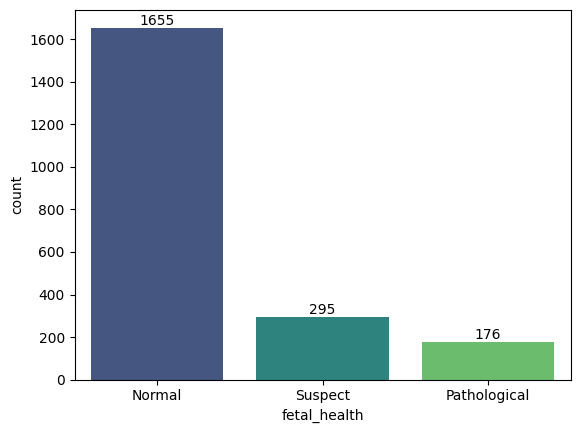

In [42]:
# Evaluating the target column and checking for imbalance of the data,
ax = sns.countplot(data= df, x="fetal_health", palette='viridis')
ax.bar_label(ax.containers[0])
xtick_positions = range(len(df['fetal_health'].unique()))
xtick_labels = ['Normal', 'Suspect', 'Pathological']
plt.xticks(xtick_positions, xtick_labels)
plt.show()

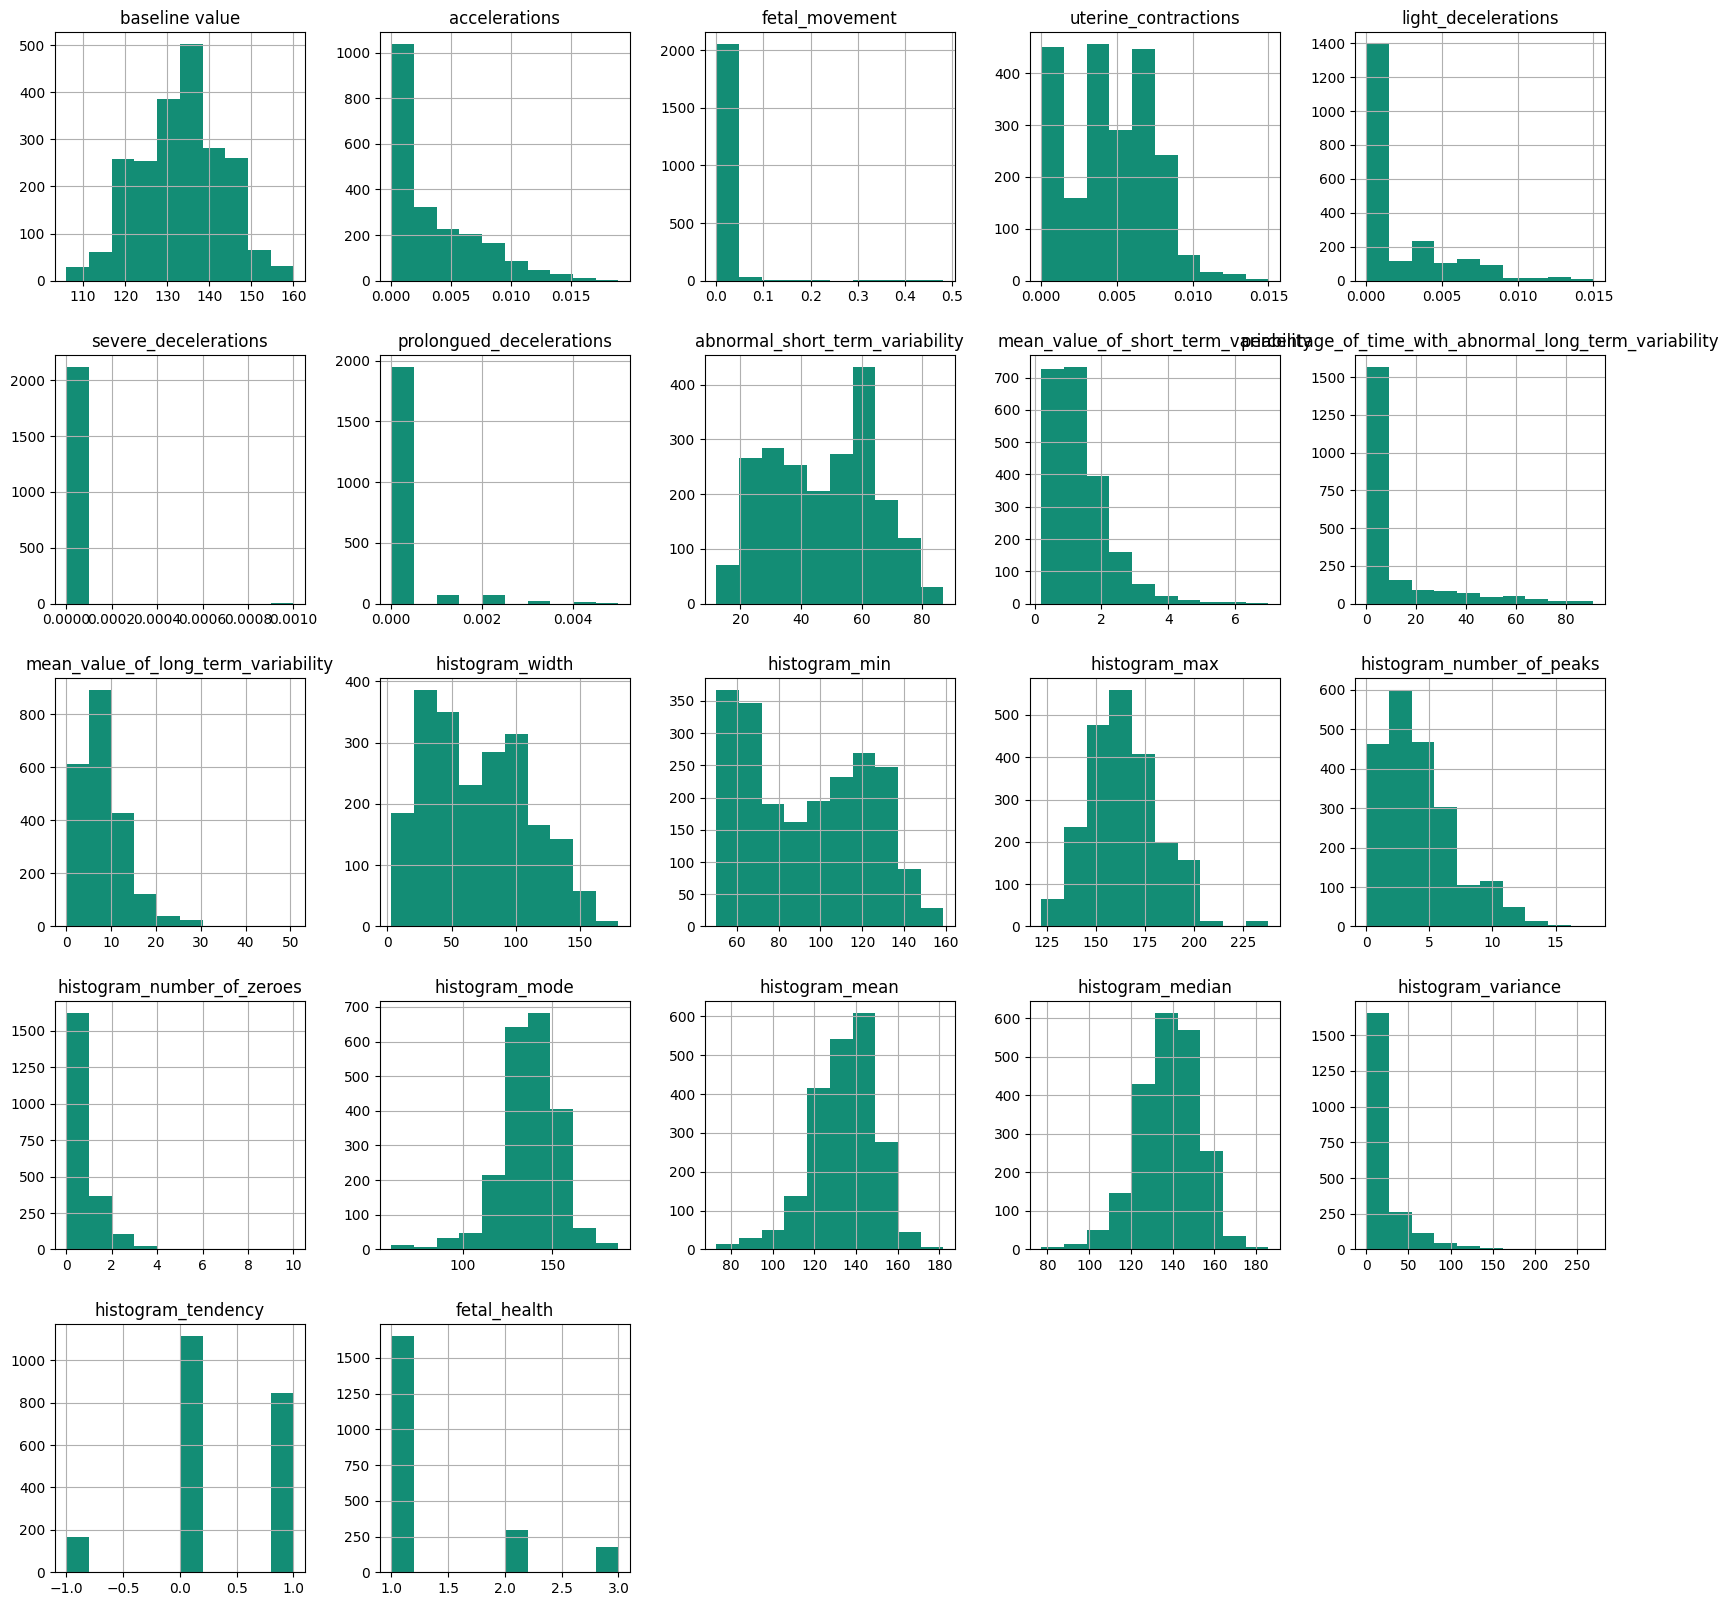

In [43]:
# Evaluating distributions of the features
hist_plot = df.hist(figsize = (20,20), color = '#138D75')

<Axes: >

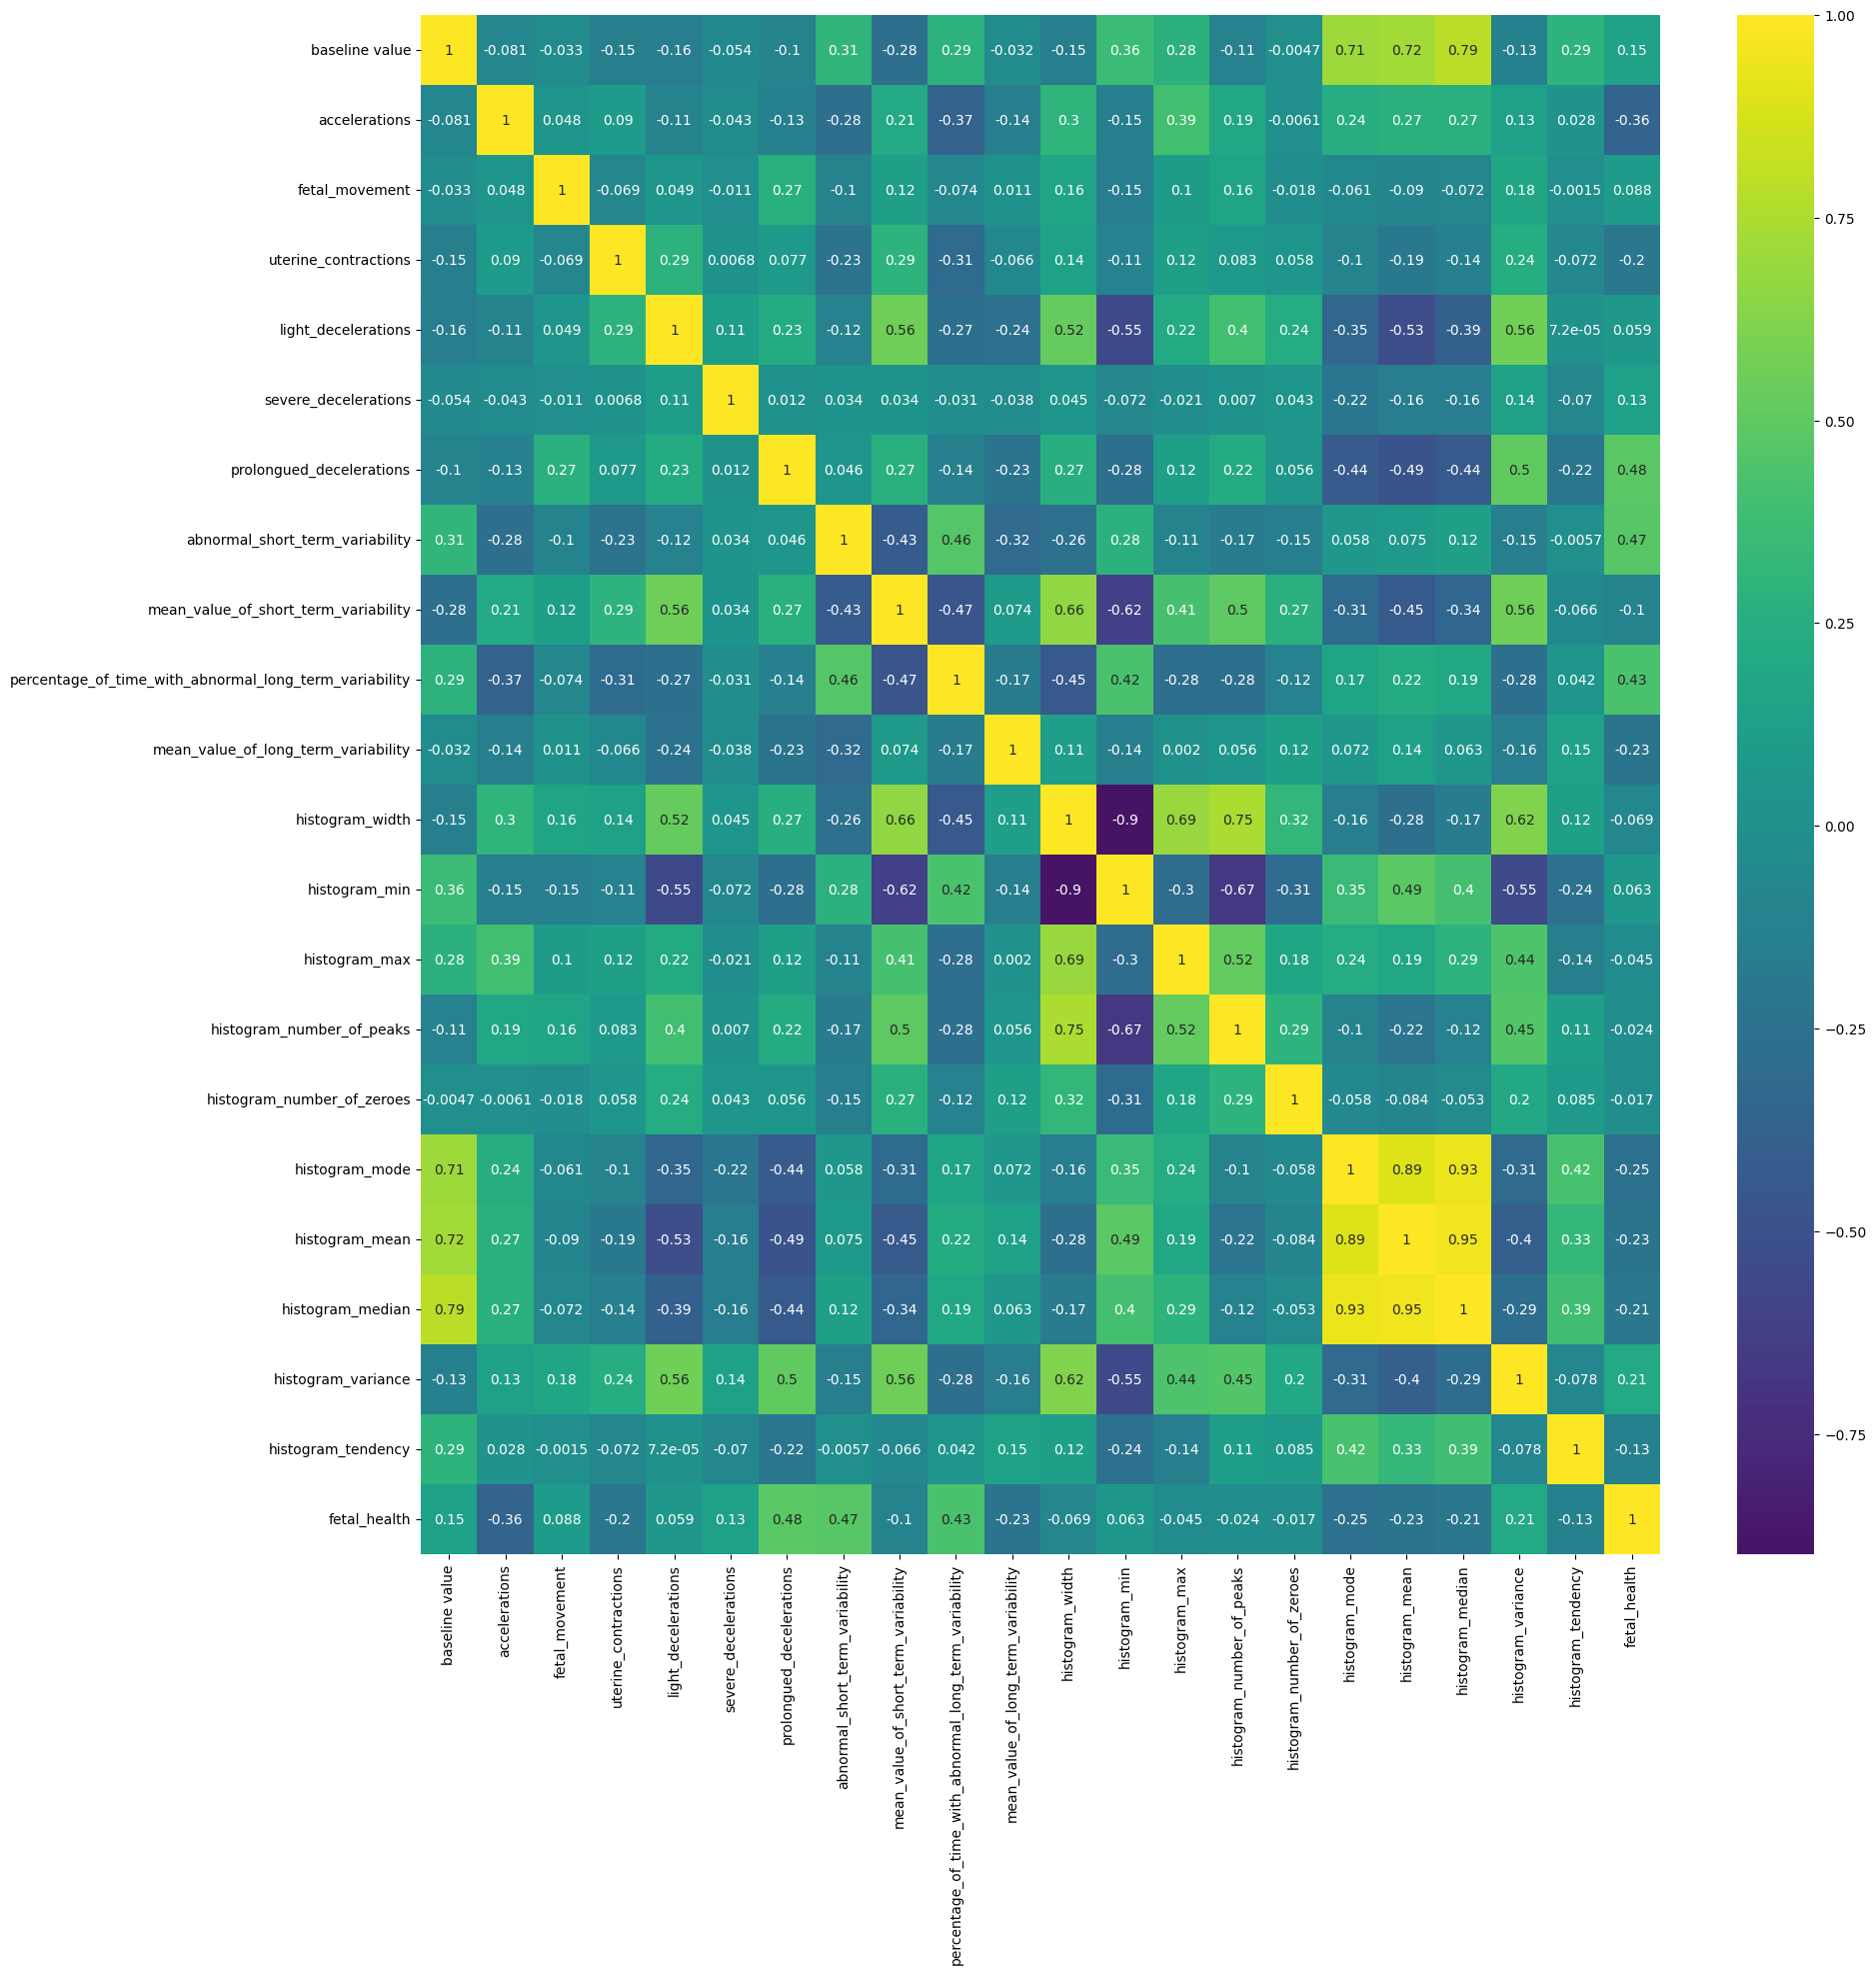

In [44]:
# correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap='viridis', center=0)

In [45]:
# computes and displays the correlation between characteristics and the target variable "fetal_health."
corr_feature = corrmat["fetal_health"].sort_values(ascending=False).to_frame()
style = corr_feature.style.background_gradient(cmap='viridis')
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


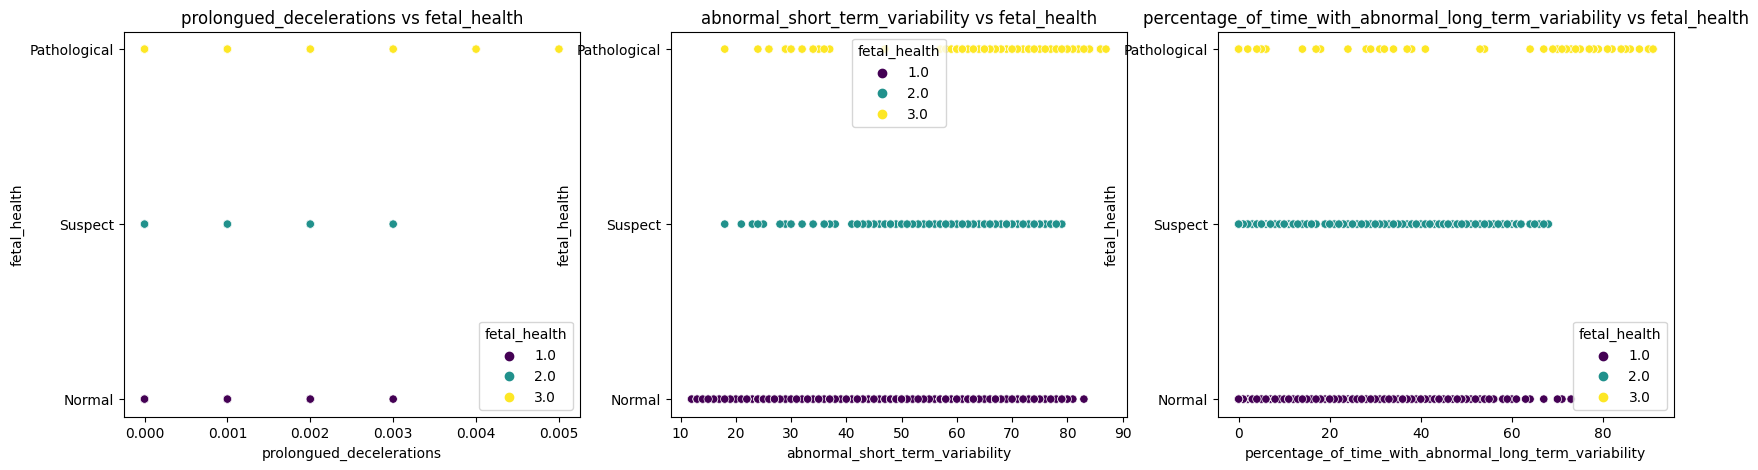

In [46]:
columns_to_plot = ['prolongued_decelerations','abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability']

# Create a grid of scatter plots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

xtick_positions = range(1,len(df['fetal_health'].unique())+1)
xtick_labels = ['Normal', 'Suspect', 'Pathological']

# Iterate over each column and create a scatter plot
for i, column in enumerate(columns_to_plot):
    sns.scatterplot(data=df, x=column, y="fetal_health", ax=axes[i], palette='viridis', hue="fetal_health")
    axes[i].set_title(f"{column} vs fetal_health")
    axes[i].set_yticks(xtick_positions, xtick_labels)


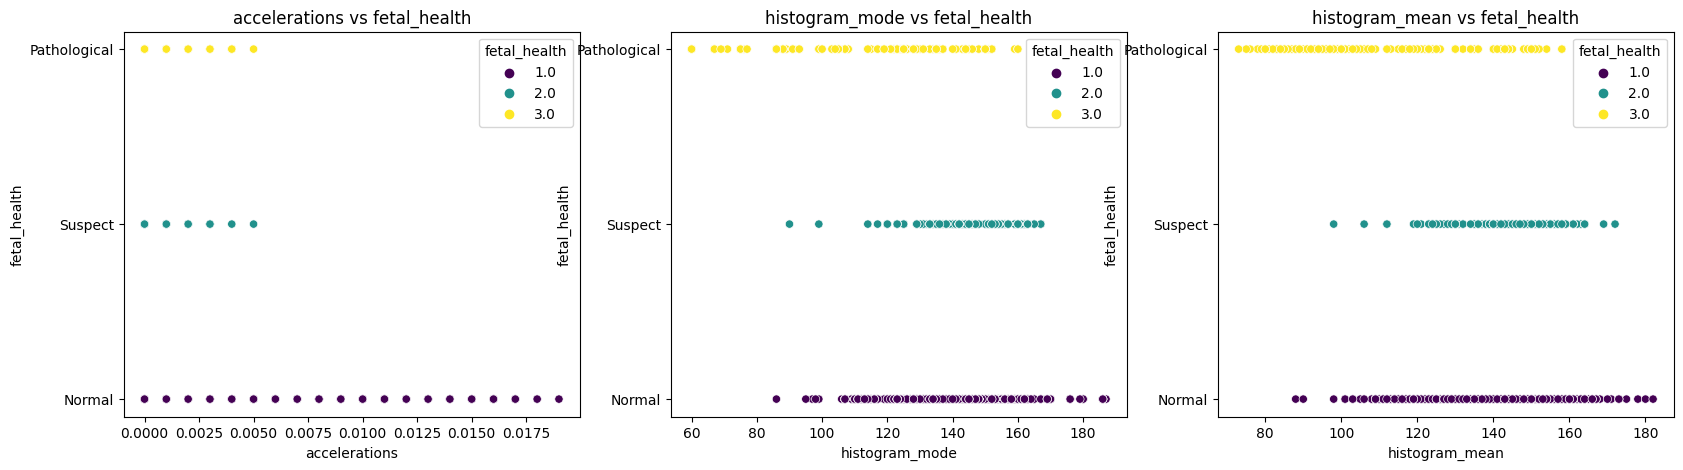

In [47]:
columns_to_plot = ['accelerations','histogram_mode', 'histogram_mean']

# Create a grid of scatter plots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

xtick_positions = range(1,len(df['fetal_health'].unique())+1)
xtick_labels = ['Normal', 'Suspect', 'Pathological']

# Iterate over each column and create a scatter plot
for i, column in enumerate(columns_to_plot):
    sns.scatterplot(data=df, x=column, y="fetal_health", ax=axes[i], palette='viridis', hue="fetal_health")
    axes[i].set_title(f"{column} vs fetal_health")
    axes[i].set_yticks(xtick_positions, xtick_labels)


In [48]:
#divides the data into features (X) and the target variable (Y) in order to prepare it for a machine learning model.
X0=df.drop(["fetal_health"],axis=1)
Y=df["fetal_health"]

s_scaler = preprocessing.StandardScaler()
X = s_scaler.fit_transform(X0)

In [49]:
'''
Resolving class imbalance
'''
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)

'\nResolving class imbalance\n'

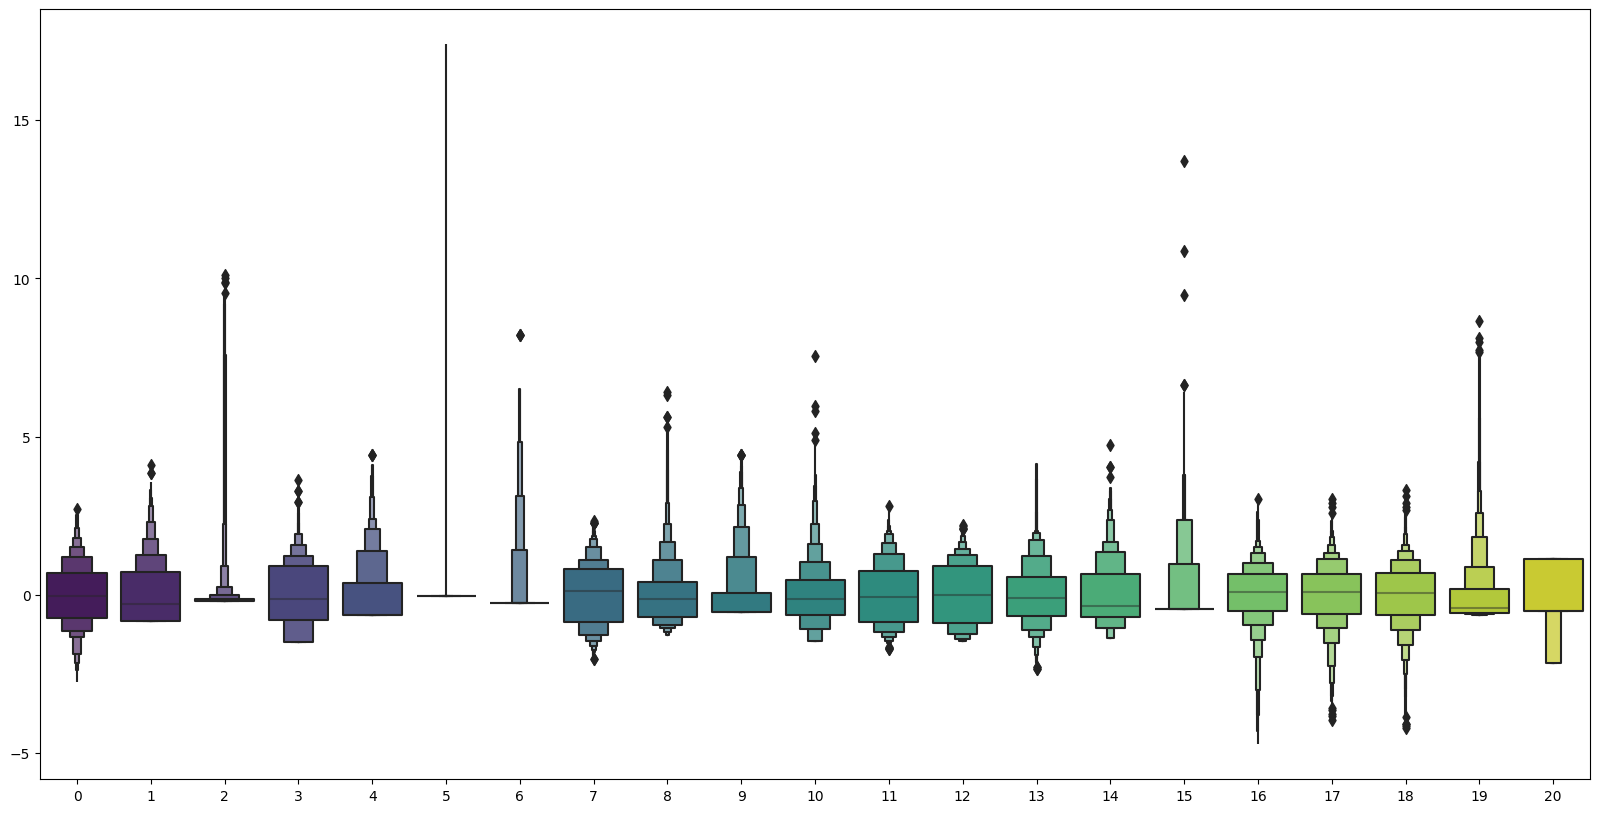

In [50]:
#The boxen plot is utilised to illustrate the feature distribution in the standardised feature matrix 'X'.
plt.figure(figsize=(20,10))
sns.boxenplot(data = X,palette = 'viridis')
# plt.xticks(rotation=60)
plt.show()

In [51]:
# removal of outliers for every numerical feature in the DataFrame 'df', with the exception of particular columns.
for each in df.columns:
    if each not in ['severe_decelerations', 'prolongued_decelerations', 'histogram_number_of_zeroes', 'fetal_health']:
        q1 = df[each].quantile(0.25)
        q3 = df[each].quantile(0.75)
        IQR = q3 - q1
        Lower_Whisker = q1 - (1.5*IQR)
        Upper_Whisker = q3 + (1.5*IQR)
        df[each] = df[each][(df[each]>Lower_Whisker) & (df[each]<Upper_Whisker)]


In [52]:
null_value_count = df.columns[df.isna().any()]
print(f"Null values present in the dataset:\n{df[null_value_count].isnull().sum()}")

df.dropna(inplace=True)

Null values present in the dataset:
accelerations                                              14
fetal_movement                                            307
uterine_contractions                                        1
light_decelerations                                       150
mean_value_of_short_term_variability                       83
percentage_of_time_with_abnormal_long_term_variability    309
mean_value_of_long_term_variability                        71
histogram_max                                              24
histogram_number_of_peaks                                  41
histogram_mode                                             73
histogram_mean                                             50
histogram_median                                           28
histogram_variance                                        191
dtype: int64


In [53]:

# pca = PCA(n_components=10)
# pca.fit(X)
# PCA_df = pd.DataFrame(pca.transform(X))
# PCA_df.describe()

In [54]:
#visualize the Explained Variance and cumulative variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [55]:
# plot_variance(pca);

In [56]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [57]:
import warnings
warnings.filterwarnings('ignore')
pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

pipeline_xgb = Pipeline([('knn_classifier',xgb.XGBClassifier(eval_metric='merror'))])

# List of all the pipelines
pipelines = [pipeline_rf, pipeline_svc, pipeline_knn, pipeline_xgb]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = { 0: 'RandomForest', 1: "SVC", 2: "knn_classifier", 3: "xgb_classifier"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, Y_train)

#cross validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,Y_train, cv=5 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

RandomForest: 0.932814 
SVC: 0.899864 
knn_classifier: 0.892486 
xgb_classifier: 0.936172 


In [58]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV
parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 6, 8, 12],
    'min_child_weight': [1, 5, 10],
}

#Fitting the trainingset to find parameters with best accuracy

CV_xgb = GridSearchCV(estimator=xgb.XGBClassifier(eval_metric='merror'), param_grid=parameters, cv= 2)
CV_xgb.fit(X_train, Y_train)

#Getting the outcome of gridsearch

CV_xgb.best_params_

{'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200}

In [59]:
# train a classification model on the training set and assesses its performance on the test set using XGBoost (Extreme Gradient Boosting).
xgb_model = xgb.XGBClassifier(eval_metric='merror', **CV_xgb.best_params_)
xgb_model.fit(X_train, Y_train)
#Testing the Model on test set
predictions=xgb_model.predict(X_test)
acccuracy= accuracy_score(Y_test,predictions)
acccuracy

0.945141065830721

In [60]:
predictions = xgb_model.predict(X_test)

In [61]:
#computes and generates a range of performance indicators to assess the categorization model.
acccuracy = accuracy_score(Y_test, predictions)
recall = recall_score(Y_test, predictions, average="weighted")
precision = precision_score(Y_test, predictions, average="weighted")
f1score = f1_score(Y_test, predictions, average="weighted")

print("********* XGBClassifier Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1score)

********* XGBClassifier Results *********
Accuracy    :  0.945141065830721
Recall      :  0.945141065830721
Precision   :  0.9451367568324553
F1 Score    :  0.9449577056561091


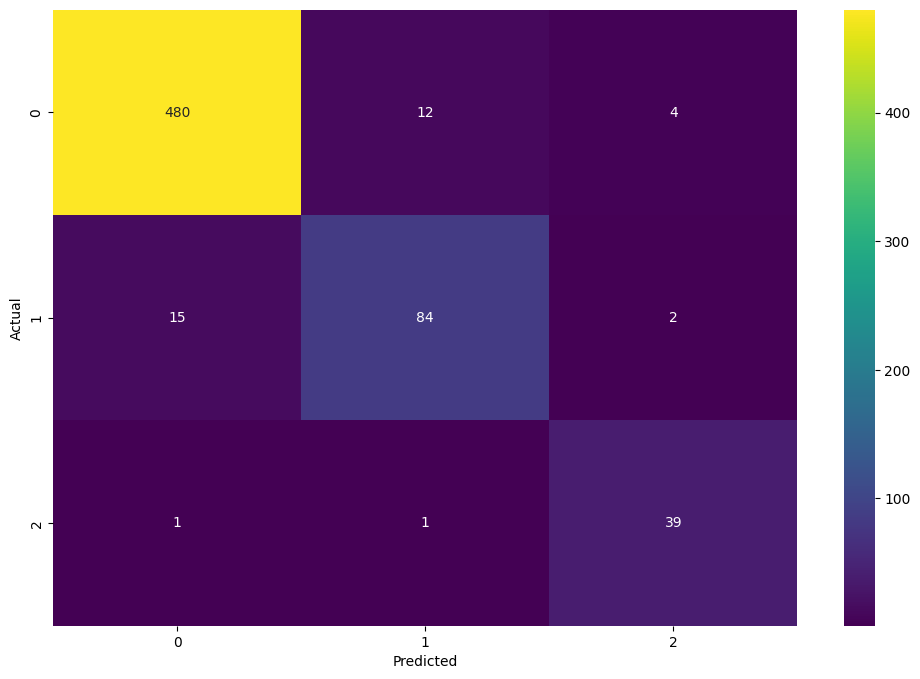

In [62]:
# makes a heatmap to show the confusion matrix in order to assess how well a classification model is performing.
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test, predictions)
sns.heatmap(cf_matrix, cmap='viridis',annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

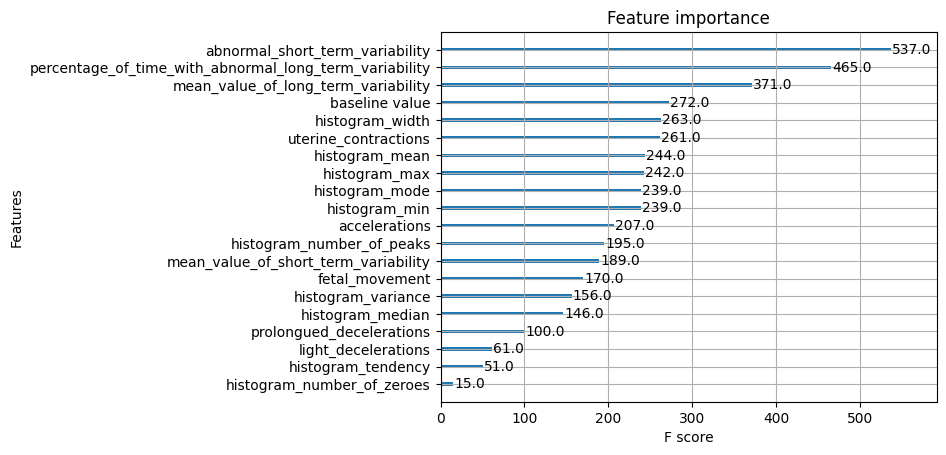

In [63]:
# uses XGBoost's plot_importance function to visualise feature importance.

axsub = plot_importance(xgb_model, importance_type='weight')
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(df.columns[:-1]))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(labels=lst_yticklabels)
plt.show()

In [64]:
from IPython.display import HTML
html_string = """
    <h1 style='background:#58D68D; border:10; color:black; text-align:center;'>The End<br>Thank You&#127802;</h1>
"""
HTML(html_string)